## Simple Linear Regression with one variable

### Step 01: Import library

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

### Step 02: Import the data

In [22]:
house_price = pd.read_csv('../resources/data/house_prices_bedrooms.csv')

In [23]:
#print the first 5 rows of the dataframe
print(house_price.head())
#print the shape of the dataframe
print(house_price.shape)

   no_of_bedrooms  house_price($)
0             1.0          165000
1             1.5          185000
2             2.0          220000
3             2.5          245000
4             3.0          285000
(19, 2)


### Step 03: Define the feature(x) and target(y)

In [24]:
#it's important to reshape the feature values because the scikit-learn library expects the feature values to be in a 2-D array
#reshape(-1, 1) means that the number of rows is unknown(figure out it automatically) and the number of columns is 1
X = house_price['no_of_bedrooms'].values.reshape(-1, 1)
y = house_price['house_price($)']

### Step 04: Split the data into training and testing

In [25]:
from sklearn.model_selection import train_test_split

#train_size is the size of the training set 
#random_state is the seed for the random number generator (to reproduce the same results)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [26]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13, 1), (6, 1), (13,), (6,))

### Step 05: Select Model

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Step 06: Train or fit the model

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
#model.intercept_ is the value of the y-intercept
model.intercept_

-72649.86059479555

In [11]:
#model.coef_ is the value of the slope
model.coef_

array([121991.17100372])

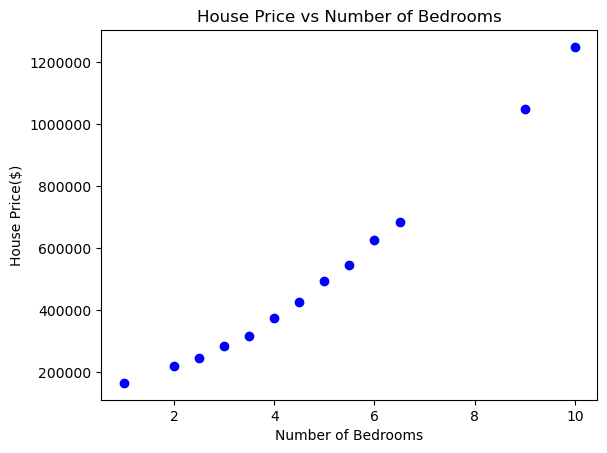

In [12]:
#plot the regression line

#create the scatter plot
plt.scatter(X_train, y_train, color='blue')

#add title and labels
plt.title('House Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price($)')

# Set y-axis to display in regular numbers (not scientific notation)
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%d' % x))

#display the plot
plt.show()

### Step 07: Predict using the model

In [13]:
y_pred = model.predict(X_test)

In [16]:
for i in range(len(y_pred)):
    print(f"Actual value: {y_test.values[i]}, Predicted value: {y_pred[i]}")

Actual value: 965000, Predicted value: 964275.0929368031
Actual value: 825000, Predicted value: 842283.9219330857
Actual value: 1150000, Predicted value: 1086266.2639405206
Actual value: 750000, Predicted value: 781288.3364312269
Actual value: 895000, Predicted value: 903279.5074349444
Actual value: 185000, Predicted value: 110336.8959107807


### Step 08: Evaluate the model

In [65]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [66]:
mean_absolute_error(y_test, y_pred)

32662.25216852543

In [67]:
mean_absolute_percentage_error(y_test, y_pred)

0.08861250368620387

In [68]:
mean_squared_error(y_test, y_pred)

1830556318.6625328


**Important** - Scikit-learn's `Linear Regression` implementation does not use gradient descent by default. Instead uses a mathematical approach called the **Normal Equation** to find the coefficients that minimize the loss function in the linear model. It is efficient when the number of features in the dataset is small.